### Is there any seasonal effect in Seattle airbnb listing price? What would be best time to visit if I want to save some money?




In [3]:
# Import libraries
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'

# Load csv into dataframes
calender_df= pd.read_csv('..//data//calendar.csv')

# Initial data lookup
def get_shape(df):
    print('The shape of the dataframe is : '+ str(df.shape))
    
def get_head(df, rows = 5):
    print("########################################################################")
    print(df.head(rows))

In [4]:
# Get Shape
get_shape(calender_df);

The shape of the dataframe is : (1393570, 4)


In [5]:
# Get head
get_head(calender_df);

########################################################################
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [6]:
# Missing Values
def get_missing_values_by_column(df):
    all_cols = df.columns.values
    print(all_cols)
    for col in all_cols:
        missing_percent = df[col].isnull().mean()
        if missing_percent > 0:
            print("Column " + col + " has " + str(float("{0:.2f}".format(missing_percent * 100))) + "% missing values" )
            
get_missing_values_by_column(calender_df)

['listing_id' 'date' 'available' 'price']
Column price has 32.94% missing values


In [7]:
# Replace t and f in 'available' coulnm by 1 and 0 repsp to count 
calender_df['available'].replace(['t','f'],[1,0],inplace=True)

#Replace NaNs in price ccolumn by 0
calender_df.fillna(value=0,inplace=True)


In [8]:
def get_float_val (df):
    df.replace(regex=True,inplace=True,to_replace='[^a-zA-Z0-9\n\.]',value='')
    df = df.astype(dtype='float')
    # since host left it blank..replacing null values with 0 
    return df.fillna(value = 0).copy()

In [9]:
get_float_val(calender_df['price'])
get_head(calender_df);

########################################################################
   listing_id        date  available  price
0      241032  2016-01-04          1  85.00
1      241032  2016-01-05          1  85.00
2      241032  2016-01-06          0      0
3      241032  2016-01-07          0      0
4      241032  2016-01-08          0      0


In [10]:
def count_days_since(oldDate):
    return oldDate.month
# host since
calender_df['Month'] = pd.to_datetime(calender_df.date).apply(count_days_since)
calender_df['price'] = calender_df['price'].astype(dtype='float')
calender_df['Month'] = calender_df['Month'].astype(dtype='float')
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null int64
price         1393570 non-null float64
Month         1393570 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 53.2+ MB


In [11]:
datas = calender_df.groupby(['Month']).price.sum()
print(datas)

Month
1.0      7981548.0
2.0      9113355.0
3.0     10798161.0
4.0     10272371.0
5.0     11159008.0
6.0     11391415.0
7.0     11288732.0
8.0     11502179.0
9.0     11065949.0
10.0    11296639.0
11.0    11096625.0
12.0    11949282.0
Name: price, dtype: float64


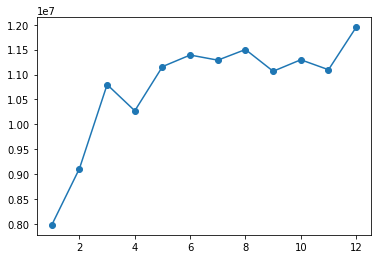

In [21]:
import matplotlib.pyplot as plt

#Step 1 - Prepare Data
data = calender_df

#Step 2 - Create Plot
fig = plt.figure()

#Step 3 - Plot
ax = fig.add_subplot(111)

#Step 4 - Customize plot
ax.plot(datas,marker='o')

#Step 5 - plt.show()
plt.show()
    
